# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Fatih El Haq
- **Email:** f.elhaq23@gmail.com
- **ID Dicoding:** fatih_el_haq_uUNC

## Menentukan Pertanyaan Bisnis

Pertanyaan Bisnis 1

**Bagaimana sebaran pesanan produk dalam rentang waktu satu hari, satu minggu, dan satu bulan?**

Alasan: Menganalisis distribusi pesanan produk bagi perusahaan e-commerce sangat penting untuk optimalisasi logistik dan pemasar saat jumlah pesanan memuncak (periode sibuk).

Pertanyaan Bisnis 2

**Kategori produk apa saja yang memiliki paling banyak dan paling sedikit dalam hal jumlah item yang dipesan, total nilai item yang dipesan, dan rata-rata jumlah item per order?**

Alasan: Dengan mengetahui kategori produk mana saja yang disenangi oleh pelanggan, perusahaan dapat memfokuskan promosi dan pemasarannya pada kategori tersebut untuk mendorong penjualan.

## Import Semua Packages/Library yang Digunakan

Install package jika dibutuhkan

In [28]:
!pip install googletrans==3.1.0a0


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import geopandas as gpd
from googletrans import Translator
translator = Translator()

## Data Wrangling

### Gathering Data

In [31]:
file_id = '1f-Jz07Cn3md5j91Zrti84nH2UTjhAywO'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'orders_datasets.csv'
gdown.download(url, output, quiet=False)
df_orders = pd.read_csv('orders_datasets.csv')
df_orders.head()

Downloading...
From: https://drive.google.com/uc?id=1f-Jz07Cn3md5j91Zrti84nH2UTjhAywO
To: c:\Users\felha\Downloads\orders_datasets.csv
100%|██████████| 17.7M/17.7M [00:06<00:00, 2.55MB/s]


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [32]:
file_id = '1fLrniekI9fxXV2NA_V_WAHrz45IVOhHb'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'orders_items_datasets.csv'
gdown.download(url, output, quiet=False)
df_orders_items = pd.read_csv('orders_items_datasets.csv')
df_orders_items.head()

Downloading...
From: https://drive.google.com/uc?id=1fLrniekI9fxXV2NA_V_WAHrz45IVOhHb
To: c:\Users\felha\Downloads\orders_items_datasets.csv
100%|██████████| 15.4M/15.4M [00:07<00:00, 2.20MB/s]


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [33]:
file_id = '1zkBzUGVstOu2WEpX3HqIAqinqKdit-gJ'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'orders_reviews_datasets.csv'
gdown.download(url, output, quiet=False)
df_orders_reviews = pd.read_csv('orders_reviews_datasets.csv')
df_orders_reviews.head()

Downloading...
From: https://drive.google.com/uc?id=1zkBzUGVstOu2WEpX3HqIAqinqKdit-gJ
To: c:\Users\felha\Downloads\orders_reviews_datasets.csv
100%|██████████| 14.5M/14.5M [00:06<00:00, 2.17MB/s]


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [34]:
file_id = '11rdsiX-Nv_FzutRloNWTh9bqh_6U8bZo'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'orders_payments_datasets.csv'
gdown.download(url, output, quiet=False)
df_orders_payments = pd.read_csv('orders_payments_datasets.csv')
df_orders_payments.head()

Downloading...
From: https://drive.google.com/uc?id=11rdsiX-Nv_FzutRloNWTh9bqh_6U8bZo
To: c:\Users\felha\Downloads\orders_payments_datasets.csv
100%|██████████| 5.78M/5.78M [00:03<00:00, 1.77MB/s]


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [35]:
file_id = '1dx7oDrepCDVxt3Ze3eDog2u4y55qdUcE'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'orders_customer_datasets.csv'
gdown.download(url, output, quiet=False)
df_customers = pd.read_csv('orders_customer_datasets.csv')
df_customers.head()

Downloading...
From: https://drive.google.com/uc?id=1dx7oDrepCDVxt3Ze3eDog2u4y55qdUcE
To: c:\Users\felha\Downloads\orders_customer_datasets.csv
100%|██████████| 9.03M/9.03M [00:04<00:00, 2.07MB/s]


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [36]:
file_id = '1seWkVCHjgXWvIWhLZaljgdiheHF66cLW'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'products_datasets.csv'
gdown.download(url, output, quiet=False)
df_products = pd.read_csv('products_datasets.csv')
df_products.head()

Downloading...
From: https://drive.google.com/uc?id=1seWkVCHjgXWvIWhLZaljgdiheHF66cLW
To: c:\Users\felha\Downloads\products_datasets.csv
100%|██████████| 2.38M/2.38M [00:01<00:00, 1.55MB/s]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [37]:
file_id = '1mkwD1IVNh_puSlEsofp35A0TTSg2GAV9'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'sellers_datasets.csv'
gdown.download(url, output, quiet=False)
df_sellers_datasets = pd.read_csv('sellers_datasets.csv')
df_sellers_datasets.head()

Downloading...
From: https://drive.google.com/uc?id=1mkwD1IVNh_puSlEsofp35A0TTSg2GAV9
To: c:\Users\felha\Downloads\sellers_datasets.csv
100%|██████████| 175k/175k [00:00<00:00, 1.05MB/s]


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [38]:
file_id = '1DxLd-RocVCpg80WpswoOBkiueJMQaJCf'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'geolocation_dataset.csv'
gdown.download(url, output, quiet=False)
df_geolocation_dataset = pd.read_csv('geolocation_dataset.csv')
df_geolocation_dataset.head()

Downloading...
From: https://drive.google.com/uc?id=1DxLd-RocVCpg80WpswoOBkiueJMQaJCf
To: c:\Users\felha\Downloads\geolocation_dataset.csv
100%|██████████| 61.3M/61.3M [00:17<00:00, 3.41MB/s]


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- Anda dapat melihat hubungan detail dari dataset dalam Entity Relationship Diagram (ERD) di bawah ini. ERD ini akan digunakan untuk menggambarkan perubahan dalam dataset selanjutnya.
- Proyek analisis data ini menggunakan gdrive untuk penyimpanan dataset, oleh karena itu library gdown digunakan untuk mengekstrak dataset ke dalam notebook.
- Terdapat 8 tabel data seperti yang digambarkan di bagian awal pengumpulan data. Masing-masing tabel memiliki kolom/atribut yang berbeda yang dapat diasosiasikan dengan primary key-nya.




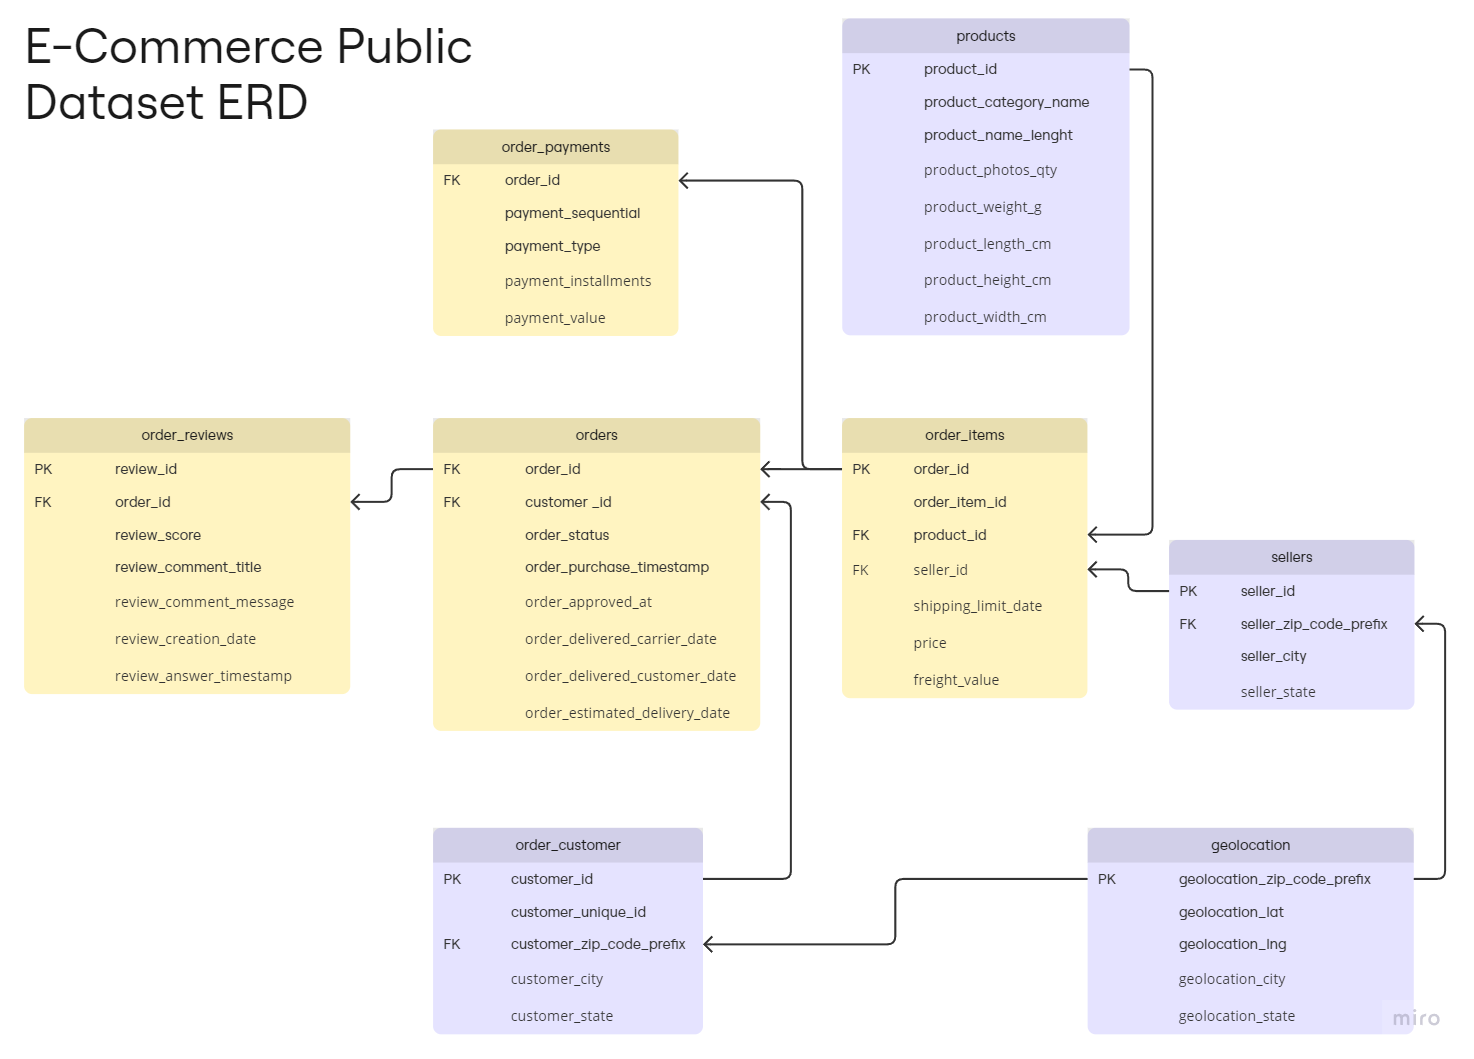

### Assessing Data

In [39]:
# Creating function for generating dataframe summary
def get_dataframe_summary(dfs):
  summary_data = []

  for df_name, df in dfs.items():
    if not isinstance(df, pd.DataFrame):
      print(f"Warning: {df_name} is not a pandas DataFrame. Skipping.")
      continue

    for col_name in df.columns:
      summary_data.append({
          'DataFrame Name': df_name,
          'Column Name': col_name,
          'dtype': df[col_name].dtype,
          'Minimum Value': df[col_name].min() if pd.api.types.is_numeric_dtype(df[col_name]) else np.nan,
          'Maximum Value': df[col_name].max() if pd.api.types.is_numeric_dtype(df[col_name]) else np.nan,
          'Number of Rows': len(df),
          'Number of Missing Values': df[col_name].isnull().sum(),
          'Number of Unique Values': df[col_name].nunique(),
          'Number of Duplicated Values': df.duplicated(subset=[col_name]).sum()
      })

  return pd.DataFrame(summary_data)

# Apply function on avalaible dataframes
dataframes = {'df_orders': df_orders, 'df_orders_items': df_orders_items,
              'df_orders_reviews': df_orders_reviews, 'df_orders_payments': df_orders_payments,
              'df_customers': df_customers, 'df_products': df_products,
              'df_sellers_datasets': df_sellers_datasets, 'df_geolocation_dataset': df_geolocation_dataset}

summary_dataset = get_dataframe_summary(dataframes)
summary_dataset


,DataFrame Name,Column Name,dtype,Minimum Value,Maximum Value,Number of Rows,Number of Missing Values,Number of Unique Values,Number of Duplicated Values
0,df_orders,order_id,object,NaN,NaN,99441,0,99441,0
1,df_orders,customer_id,object,NaN,NaN,99441,0,99441,0
2,df_orders,order_status,object,NaN,NaN,99441,0,8,99433
3,df_orders,order_purchase_timestamp,object,NaN,NaN,99441,0,98875,566
4,df_orders,order_approved_at,object,NaN,NaN,99441,160,90733,8707
5,df_orders,order_delivered_carrier_date,object,NaN,NaN,99441,1783,81018,18422
6,df_orders,order_delivered_customer_date,object,NaN,NaN,99441,2965,95664,3776
7,df_orders,order_estimated_delivery_date,object,NaN,NaN,99441,0,459,98982
8,df_orders_items,order_id,object,NaN,NaN,112650,0,98666,13984
9,df_orders_items,order_item_id,int64,1.000000,21.000000,112650,0,21,112629


**Insight:**

**Isu**
- Dalam df_orders_items, banyak nilai order_item_id yang terduplikasi.
- Tipe data untuk kolom yang berhubungan dengan tanggal bertipe 'object' dtype
- Dalam df_orders, terdapat jumlah nilai pada kolom order_delivered_carrier_date dan order_delivered_customer_date yang hilang
- Dalam df_orders_reviews, terdapat review_id yang terduplikasi
- Dalam df_products, terdapat nilai yang hilang dalam kolom product_category_name

**Langkah Lebih Lanjut**
- Memastikan order_item_id dapat dijadikan identifier dalam df_orders_items
- Mengkonversi tipe data dari 'object' ke 'datetime' dalam kolom yang berhubungan dengan tanggal
- Memahami alasan adanya nilai yang hilang dalam df_orders
- Mengecek penyebab adanya duplikasi ID dalam df_orders_reviews
- Menentukan bagaimana menangani data yang hilang dalam df_products


### Cleaning Data

#### Cleaning `df_orders_items`

**(Inaccurate value)** Memastikan order_item_id dapat dijadikan identifier dalam df_orders_items

In [40]:
print(df_orders_items['order_item_id'].value_counts())

order_item_id
1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: count, dtype: int64


Berdasarkan penjelasan dalam sumber dataset, kolom order_item_id memperlihatkan urutan nomor item yang dipesan dalam satu order. Misal untuk order dengan 3 item maka terdapat 3 baris dengan order_id yang sama dan order_item_id dengan urutan 1, 2, dan 3.

Format penamaan id ini tidak unik sehingga diperlukan penamaan id baru agar tiap baris dalam df_order_items unik. Dalam tabel tersebut, kolom baru bernama `item_id` ditambahkan dari hasil kombinasi antara order_id dan order_item_id

In [41]:
df_orders_items['item_id'] = df_orders_items['order_id'] + '_' + df_orders_items['order_item_id'].astype(str)
first_col = df_orders_items.pop('item_id')
df_orders_items.insert(0, 'item_id', first_col)
df_orders_items

,item_id,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214_1,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3_1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e_1,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75_1,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9_1,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037_1,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb_1,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d_1,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f_1,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


#### Cleaning `df_orders`

**(Inaccurate value)** Mengkonversi tipe data dari 'object' ke 'datetime' dalam kolom yang berhubungan dengan tanggal

In [42]:
# Convert specified columns to datetime objects
date_columns = ['order_purchase_timestamp', 'order_approved_at',
                'order_delivered_carrier_date', 'order_delivered_customer_date',
                'order_estimated_delivery_date']

for col in date_columns:
    df_orders[col] = pd.to_datetime(df_orders[col])

# Check the data types of the columns
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**(Missing value)** Memahami alasan adanya nilai yang hilang dalam df_orders

In [43]:
# Assuming df_orders is already defined as a pandas DataFrame
rows_with_empty_values = df_orders[df_orders.isnull().any(axis=1)]
rows_with_empty_values

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [44]:
print(df_orders['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [45]:
# Mapping on percentages of missing values
missing_value_percentages = df_orders.groupby('order_status')[['order_purchase_timestamp', 'order_approved_at',
                                                                'order_delivered_carrier_date', 'order_delivered_customer_date',
                                                                'order_estimated_delivery_date']].apply(lambda x: (x.isnull().sum() / len(x)) * 100).astype(int)

missing_value_percentages

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_status,,,,,
approved,0,0,100,100,0
canceled,0,22,88,99,0
created,0,100,100,100,0
delivered,0,0,0,0,0
invoiced,0,0,100,100,0
processing,0,0,100,100,0
shipped,0,0,0,100,0
unavailable,0,0,100,100,0


Missing value dalam df_orders bergantung pada order_status sehingga missing value dalam kolom yang berkaitan dengan timestamp pengiriman dipertahankan karena dapat memberikan informasi terkait proses pengiriman order

#### Cleaning df_orders_reviews

**(Duplicate value)** Mengecek penyebab adanya duplikasi ID dalam df_orders_reviews

In [46]:
duplicated_review_ids = df_orders_reviews[df_orders_reviews.duplicated(subset=['review_id'], keep=False)]
duplicated_review_ids.sort_values('review_id')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
46678,00130cbe1f9d422698c812ed8ded1919,dfcdfc43867d1c1381bfaf62d6b9c195,1,NaN,"O cartucho ""original HP"" 60XL não é reconhecid...",2018-03-07 00:00:00,2018-03-20 18:08:23
29841,00130cbe1f9d422698c812ed8ded1919,04a28263e085d399c97ae49e0b477efa,1,NaN,"O cartucho ""original HP"" 60XL não é reconhecid...",2018-03-07 00:00:00,2018-03-20 18:08:23
90677,0115633a9c298b6a98bcbe4eee75345f,78a4201f58af3463bdab842eea4bc801,5,NaN,NaN,2017-09-21 00:00:00,2017-09-26 03:27:47
63193,0115633a9c298b6a98bcbe4eee75345f,0c9850b2c179c1ef60d2855e2751d1fa,5,NaN,NaN,2017-09-21 00:00:00,2017-09-26 03:27:47
92876,0174caf0ee5964646040cd94e15ac95e,f93a732712407c02dce5dd5088d0f47b,1,NaN,Produto entregue dentro de embalagem do fornec...,2018-03-07 00:00:00,2018-03-08 03:00:53
...,...,...,...,...,...,...,...
31120,fe5c833752953fed3209646f1f63b53c,4863e15fa53273cc7219c58f5ffda4fb,1,NaN,"Comprei dois produtos e ambos, mesmo enviados ...",2018-02-28 00:00:00,2018-02-28 13:57:52
7870,ff2fc9e68f8aabfbe18d710b83aabd30,2da58e0a7dcfa4ce1e00fad9d03ca3b5,2,NaN,NaN,2018-03-17 00:00:00,2018-03-19 11:44:15
82521,ff2fc9e68f8aabfbe18d710b83aabd30,1078d496cc6ab9a8e6f2be77abf5091b,2,NaN,NaN,2018-03-17 00:00:00,2018-03-19 11:44:15
73951,ffb8cff872a625632ac983eb1f88843c,c44883fc2529b4aa03ca90e7e09d95b6,3,NaN,NaN,2017-07-22 00:00:00,2017-07-26 13:41:07


Jika dilihat pada baris-baris dengan review_id yang sama, untuk baris dengan review id yang sama memiliki nilai review_score hingga review_answer_timestamp sama meskipun memiliki order_id yang berbeda sehingga penanganan pada review_id yang sama ini dilakukan dengan menghapus salah satu review_id

In [47]:
df_orders_reviews = df_orders_reviews.drop_duplicates(subset=['review_id'], keep='first')
df_orders_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


#### Cleaning df_products

**(Missing value)** Menentukan bagaimana menangani data yang hilang dalam df_products

In [48]:
rows_with_missing_product_category = df_products[df_products['product_category_name'].isnull()]
rows_with_missing_product_category

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


Missing value pada df_product tetap dipertahankan karena berkaitan dengan dataset orders. Kemudian dilakukan pengisian missing value berdasarkan konteks kolom terkait.

- product_category_name: "uncategorized"
- product_name_lenght: 0
- product_description_lenght: 0
- product_photos_qty : 0

In [49]:
df_products = df_products.fillna({
    'product_category_name': 'uncategorized',
    'product_name_lenght': 0,
    'product_description_lenght': 0,
    'product_photos_qty': 0
})
df_products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              2
product_length_cm             2
product_height_cm             2
product_width_cm              2
dtype: int64

In [50]:
# Display rows with any null values in df_products
rows_with_nulls = df_products[df_products.isnull().any(axis=1)]
rows_with_nulls

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,uncategorized,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Dalam df_products, terdapat dua baris yang memiliki nilai kosong untuk dimensi produk (weight, length, height, width). Missing value ini diimputasi berdasarkan nilai median dari kategori yang sama karena mempertimbangkan jumlahnya yang hanya dua baris sehingga dinilai tidak berpengaruh besar terhadap analisis data.

In [51]:
# Group data by 'product_category_name'
grouped = df_products.groupby('product_category_name')

# Fill NaN values with the median for each numeric column within each category
for col in ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
    df_products[col] = grouped[col].transform(lambda x: x.fillna(x.median()))

df_products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Insight:**


*   `df_orders_items` **(inaccurate value)**: Penambahan identifier baru bernama item_id yang merupakan kombinasi antara order_id dan order_item_id untuk identifikasi order_item lebih mudah
*   `df_orders` **(inaccurate value)**: Penggantian tipe data pada kolom yang berhubungan dengan tanggal dari object menjadi datetime untuk memudahkan proses analisis
*   `df_orders` **(missing value)**: Mempertahankan missing value pada kolom yang berhubungan dengan tanggal karena memberikan informasi mengenai proses pengiriman order
*   `df_orders_reviews` **(duplicate value)**: Menghapus baris yang memiliki revies_id yang sama karena memiliki konten review yang sama meskipun berbeda order_id
*   `df_products` **(missing value)**: Mengisi nilai yang hilang dalam df_products pada kolom product_category_name hingga product_width_cm






## Exploratory Data Analysis (EDA)

### Explore df_orders

In [52]:
df_orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
72213,2a06568281fa1a485b9ba5fac48c7df2,317b6bd739f5504c8cdb3979cdca9328,shipped,2018-08-21 11:00:37,2018-08-21 11:10:17,2018-08-21 17:04:00,NaT,2018-08-24
31693,20c122b304189bf992c45a91a1b88726,176f00233c93d10cbd23a3dce0ca4eeb,delivered,2018-02-13 23:45:34,2018-02-16 07:50:53,2018-02-20 18:17:07,2018-02-27 20:35:28,2018-03-06
88349,c0141f939a5a2e130bb9e329eaa20e2a,329fcf50087d2f2fae1b09d0e10baa00,delivered,2017-07-25 16:10:21,2017-07-25 16:23:23,2017-07-26 15:36:25,2017-08-01 20:04:31,2017-08-16
10523,891e419a9019fb81b67212a708cb5f83,c5ebaeed3b49cd93b3c294547784f484,canceled,2017-07-07 12:15:50,2017-07-07 12:25:20,NaT,NaT,2017-08-03
93039,45287af4d4d9504d6569383cbf95c764,b662ef3d673205d965e8c72e78932de3,delivered,2018-06-01 17:29:19,2018-06-02 17:31:37,2018-06-06 12:17:00,2018-06-14 20:32:52,2018-07-11


In [53]:
df_orders.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


Dari df_orders, kita bisa eksplor data berdasarkan kolom terkait dari `order_status` hingga `order_estimated_delivery_date`.
Terdapat beberapa pertanyaan yang dapat dijawab dari tabel ini, yaitu:

**Sisi pesanan**
*   Berapa banyak order yang ada pada tiap status pengiriman?
*   Bagaimana pertumbuhan jumlah order diterima tiap bulan?
* Bagaimana perbedaan order yang diterima dalam satu hari, satu minggu, satu bulan?
* Bagaimana pertumbuhan order yang diterima antara tahun 2017 dan tahun 2018?

**Sisi pengiriman**
* Berapa persen order yang sampai tepat waktu?
* Berapa lama pengiriman order sampai ke tangan pelanggan?
* Berapa lama pengecekan pembayaran pesanan?
* Berapa lama penjual memproses pesanan?
* Berapa lama pesanan berpindah dari penjual ke partner logistik?
* Berapa lama pesanan dikirim dari partner logistik ke pelanggan?
* Bagaimana perubaha lama rata-rata pengiriman order tiap bulan?





> **Berapa banyak order yang ada pada tiap status pengiriman?**



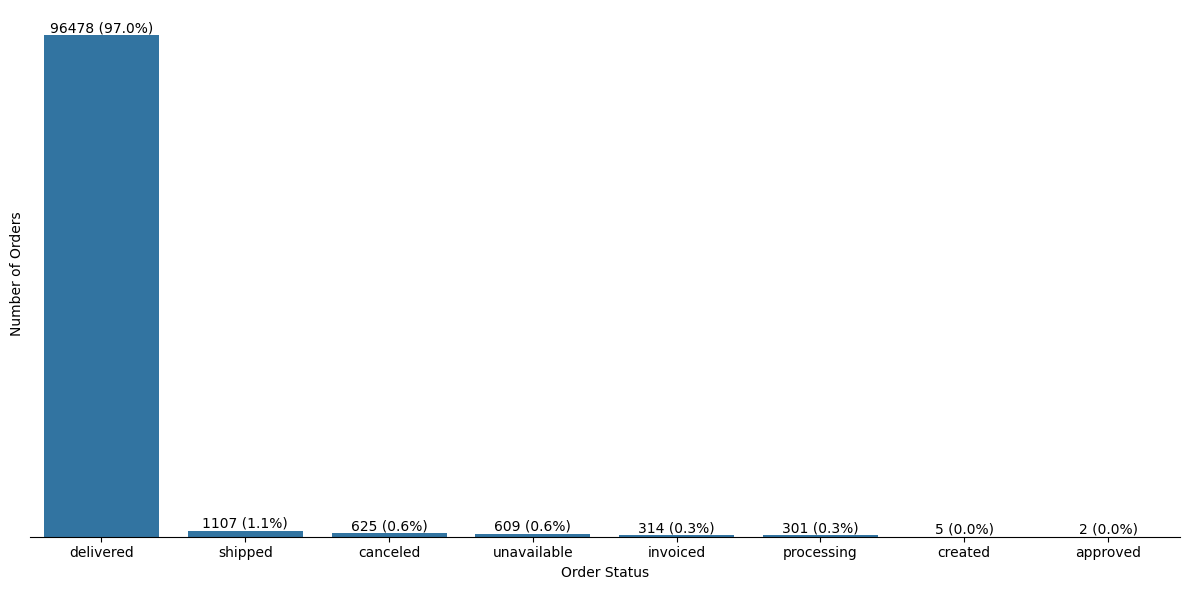

In [54]:
# Calculate order status counts and percentages
order_status_counts = df_orders['order_status'].value_counts()
order_status_percentages = (order_status_counts / len(df_orders)) * 100

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=order_status_counts.index, y=order_status_counts.values)

# Add percentage labels above the bars
for bar, percentage, count in zip(bars.patches, order_status_percentages, order_status_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{count} ({percentage:.1f}%)', ha='center', va='bottom')

# Remove the graph border
sns.despine(left=True)

# Remove the y-axis
plt.yticks([])

plt.ylabel('Number of Orders')
plt.xlabel('Order Status')
plt.tight_layout()
plt.show()

Berdasarkan grafik ini, kita dapat tiga informasi yaitu:

* Tingginya tingkat pengiriman pesanan yang berhasil (97% delivered) yang menunjukkan indikator positif pada kinerja pemenuhan pesanan dan proses pengiriman di perusahaan E-Commerce ini
* Rendahnya status pesanan yang bermasalah (0.6% canceled dan 0.6% unavalaible) yang menunjukkan perusahaan dapat menekan masalah pembatalan pesanan dan ketidaktersediaan stok. Namun hal ini perlu ditelusuri alasan adanya pesanan yang bermasalah ini untuk perbaikan kinerja berkelanjutan
* Terdapat pesanan dalam proses (1.1% shipped, 0.3% invoiced, 0.0% created, 0.0% approved), hal ini kemungkinan dikarenakan hasil cut-off dari ekstaksi data perusahaan sehingga masih ada pesanan dalam proses yang masuk ke dalam dataset



> **Bagaimana pertumbuhan jumlah order diterima tiap bulan?**



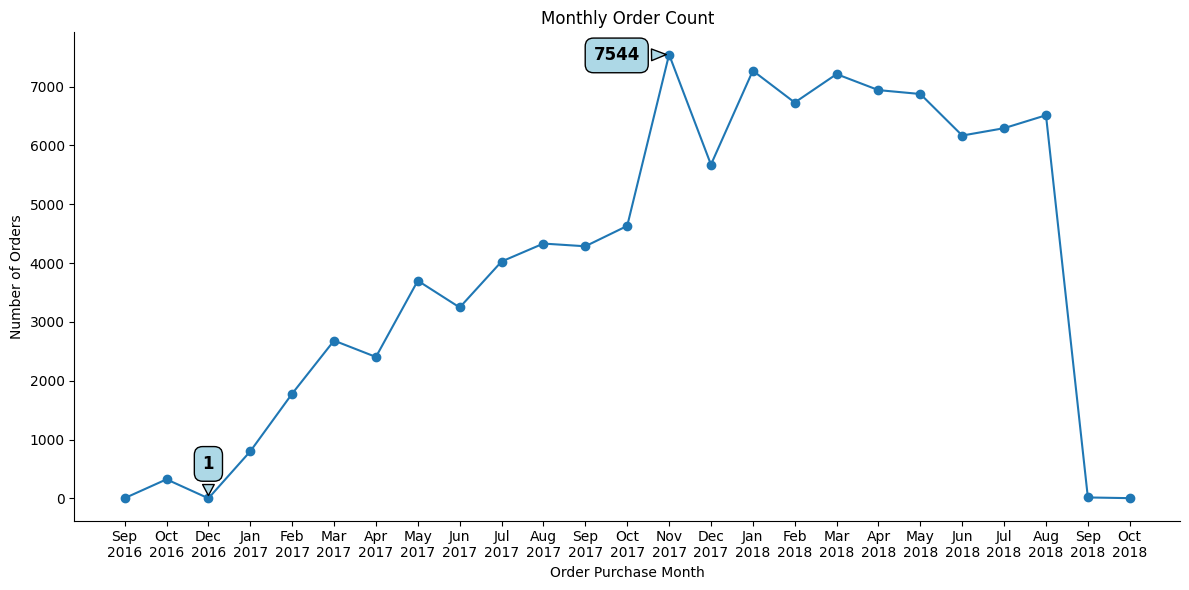

In [55]:
# Create order purchase month column
df_orders['order_purchase_month'] = df_orders['order_purchase_timestamp'].dt.to_period('M')
monthly_order_counts = df_orders.groupby('order_purchase_month')['order_id'].count()

plt.figure(figsize=(12, 6))
plt.plot(monthly_order_counts.index.astype(str), monthly_order_counts.values, marker='o')

# Modify x-axis labels to two lines (month name on first line, year on second line)
x_labels = [f"{pd.Period(m, freq='M').strftime('%b')}\n{pd.Period(m, freq='M').strftime('%Y')}" for m in monthly_order_counts.index]
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=0)

# Find highest and lowest points
max_index = monthly_order_counts.idxmax()
min_index = monthly_order_counts.idxmin()
max_value = monthly_order_counts[max_index]
min_value = monthly_order_counts[min_index]
max_x = monthly_order_counts.index.get_loc(max_index)
min_x = monthly_order_counts.index.get_loc(min_index)

# Adjust positions of annotations to avoid overlap
plt.annotate(f'{max_value}', (max_x, max_value), xytext=(max_x - 1.25, max_value - 100),
             textcoords='data', ha='center', fontsize=12, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', fc='lightblue', ec='black', lw=1),
             arrowprops=dict(arrowstyle='wedge,tail_width=0.7', fc='lightblue', ec='black'))

plt.annotate(f'{min_value}', (min_x, min_value), xytext=(min_x, min_value + 500),
             textcoords='data', ha='center', fontsize=12, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', fc='lightblue', ec='black', lw=1),
             arrowprops=dict(arrowstyle='wedge,tail_width=0.7', fc='lightblue', ec='black'))

# Remove top and right border
sns.despine(top=True, right=True)

plt.xlabel('Order Purchase Month')
plt.ylabel('Number of Orders')
plt.title('Monthly Order Count')
plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, kita mendapatkan 3 informasi yaitu:

* Adanya pertumbuh secara signifikan dari September 2016 hingga Agustus 2018 menunjukkan periode pertumbuh dalam perusahaan E-commerce ini
* Jumlah order yang dibuat memuncak pada bulan november 2017 yang memperlihatkan aktivitas bisnis yang paling sibuk. Hal ini dapat ditelurusi lebih lanjut penyebabnya seperti hari libur/event besar, kampanye perusahaan yang sukses atau penjualan musiman.
* Penurunan tajam di bulan September 2018 dan Oktober 2018 dapat disebabkan data yang belum lengkap untuk bulan tersebut. Hal ini sangat mungkin karena melihat tren positif dari bulan-bulan sebelumnya.



Bagaimana perbedaan order yang diterima dalam satu hari, satu minggu, satu bulan, satu tahun?



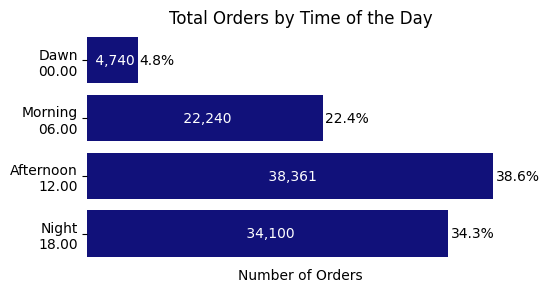

In [56]:
# Create a new column 'order_purchase_day' based on time of day
df_orders['order_purchase_day_time'] = pd.cut(df_orders['order_purchase_timestamp'].dt.hour,
                                        bins=[0, 6, 12, 18, 24],
                                        labels=['Dawn', 'Morning', 'Afternoon', 'Night'],
                                        right=False)

# Calculate order counts and percentages
order_purchase_day_counts = df_orders['order_purchase_day_time'].value_counts().reindex(['Dawn', 'Morning', 'Afternoon', 'Night'])
order_purchase_day_percentages = (order_purchase_day_counts / len(df_orders)) * 100

# Create a bar plot to visualize the count of orders per day part
plt.figure(figsize=(5.5, 3))
bars = sns.countplot(
    y='order_purchase_day_time',
    data=df_orders,
    order=['Dawn', 'Morning', 'Afternoon', 'Night'],
    color="#00008B")

# Add data labels (count and percentage)
for bar, count, percentage in zip(bars.patches, order_purchase_day_counts, order_purchase_day_percentages):
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()

    # Display count inside the bar with thousand separator
    plt.text(
        x + width / 2,   # x-position: center of the bar
        y + height / 2,  # y-position: center of the bar
        f'{count: ,}',   # Format count with thousand separator
        ha='center',      # Horizontal alignment: center
        va='center',      # Vertical alignment: center
        color='white'     # Color of the text inside the bar (white for visibility on bars)
    )
    # Display percentage to the right of the bar
    plt.text(
        width + 200,                                    # Position text at the end of the bar
        y + height / 2,                            # Vertically center text on the bar
        f'{percentage:.1f}%',                     # Format percentage with one decimal
        ha='left',
        va='center',
        color='black'  # Color for percentage text
    )

# Modify y-axis labels to two lines (time of day and hour time)
y_labels = ['Dawn\n00.00','Morning\n06.00','Afternoon\n12.00','Night\n18.00']
plt.yticks(ticks=range(len(y_labels)), labels=y_labels, rotation=0)

# Remove the graph border
sns.despine(left=True, bottom=True)

# Remove the x-axis
plt.xticks([])

plt.xlabel('Number of Orders')
plt.ylabel('')
plt.title('Total Orders by Time of the Day')
plt.show()

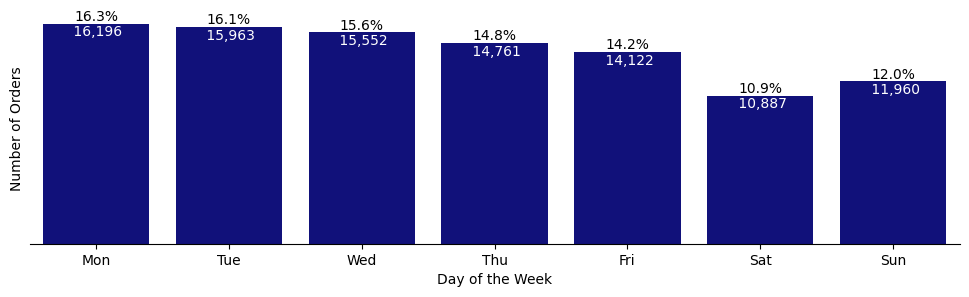

In [57]:
# Extract the day of the week (Monday=0, Sunday=6)
df_orders['order_day_of_week'] = df_orders['order_purchase_timestamp'].dt.dayofweek

# Map day of week numbers to day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_orders['order_day_name'] = df_orders['order_day_of_week'].map(lambda x: day_names[x])

# Calculate order counts and percentages
order_purchase_week_counts = df_orders['order_day_name'].value_counts().reindex(day_names)
order_purchase_week_percentages = (order_purchase_week_counts / len(df_orders)) * 100

# Create a bar plot to visualize the count of orders per day part
plt.figure(figsize=(12, 3))
bars = sns.countplot(x='order_day_name', data=df_orders, order=day_names, color="#00008B")

# Add data labels (count and percentage)
for bar, count, percentage in zip(bars.patches, order_purchase_week_counts, order_purchase_week_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{percentage:.1f}%', ha='center', va='bottom')

    bars.annotate(f'{count: ,}',
                  (bar.get_x() + bar.get_width() / 2, height - 100),
                  ha='center', va='top', fontsize=10, color='white')

# Modify x-axis labels to abbreviations
x_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=0)

# Remove the graph border
sns.despine(left=True)

# Remove the y-axis
plt.yticks([])

# Add data labels (count
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.show()

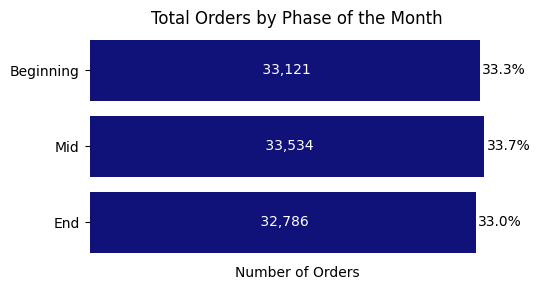

In [58]:
# Create a new column for the phase of the month
df_orders['order_purchase_day'] = df_orders['order_purchase_timestamp'].dt.day
df_orders['month_phase'] = pd.cut(
                            df_orders['order_purchase_day'],
                            bins=[0, 10, 20, 31],
                            labels=['Beginning', 'Mid', 'End'])

# Calculate order counts and percentages
order_month_phase_counts = df_orders['month_phase'].value_counts().reindex(['Beginning', 'Mid', 'End'])
order_month_phase_percentages = (order_month_phase_counts / len(df_orders)) * 100

# Create a horizontal bar plot to visualize the count of orders per month phase
plt.figure(figsize=(5.5, 3))
bars = sns.countplot(
    y='month_phase',
    data=df_orders,
    order=['Beginning', 'Mid', 'End'],
    color="#00008B" # Optional: set a color for the bars for better visibility of white text inside
)

# Add data labels (count) inside the bar and percentage to the right of each bar
for bar, count, percentage in zip(bars.patches, order_month_phase_counts, order_month_phase_percentages):
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()

    # Display count inside the bar with thousand separator
    plt.text(
        x + width / 2,   # x-position: center of the bar
        y + height / 2,  # y-position: center of the bar
        f'{count: ,}',   # Format count with thousand separator
        ha='center',      # Horizontal alignment: center
        va='center',      # Vertical alignment: center
        color='white'     # Color of the text inside the bar (white for visibility on bars)
    )
    # Display percentage to the right of the bar
    plt.text(
        width + 200,                                    # Position text at the end of the bar
        y + height / 2,                            # Vertically center text on the bar
        f'{percentage:.1f}%',                     # Format percentage with one decimal
        ha='left',
        va='center',
        color='black'  # Color for percentage text
    )

# Remove the graph border on the left side (already in original code - keep it)
sns.despine(left=True, bottom=True) # Keep bottom=True to remove bottom spine using seaborn despine as alternative
plt.xticks([])

# Set axis labels for a horizontal bar chart
plt.xlabel('Number of Orders')
plt.ylabel('')

plt.title('Total Orders by Phase of the Month')
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

Dari tiga grafik diatas (jumlah order dalam satu hari, satu minggu, dan satu bulan), kita mendapatkan beberapa informasi yaitu:
* Tidak ditemukan perbedaan mencolok untuk order yang dibuat diawal bulan, ditengah bulan, dan diakhir bulan
* Jumlah order dibuat paling tinggi terjadi di hari Senin dan paling rendah di hari Sabtu
* Pelanggan lebih banyak membuat order di siang dan malam hari dibandingkan pagi dan dini hari

### Explore df_products

In [59]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [60]:
product_category_counts = df_products.groupby('product_category_name')['product_id'].count().reset_index()
product_category_counts = product_category_counts.rename(columns={'product_id': 'number_of_products'})
product_category_counts

,product_category_name,number_of_products
0,agro_industria_e_comercio,74
1,alimentos,82
2,alimentos_bebidas,104
3,artes,55
4,artes_e_artesanato,19
...,...,...
69,tablets_impressao_imagem,9
70,telefonia,1134
71,telefonia_fixa,116
72,uncategorized,610


Dalam df_products, terdapat 73 kategori produk dengan penamaan dari bahasa Portugis. Untuk memudahkan interpretasi, nama kategori produk akan diubah menjadi bahasa inggris.

In [61]:
# Create transalation function from googletrans
def translate_to_english(text):
  text = text.replace('_', ' ')
  text = translator.translate(text, src='pt',dest='en').text
  text = text.lower()
  return text

# Apply the translation function to the 'product_category_name' column
product_category_counts['product_category_name_english'] = product_category_counts['product_category_name'].apply(translate_to_english)
product_category_counts

,product_category_name,number_of_products,product_category_name_english
0,agro_industria_e_comercio,74,agro industria e comercio
1,alimentos,82,food
2,alimentos_bebidas,104,drink foods
3,artes,55,arts
4,artes_e_artesanato,19,arts and crafts
...,...,...,...
69,tablets_impressao_imagem,9,image import tablets
70,telefonia,1134,telephony
71,telefonia_fixa,116,fixed telephony
72,uncategorized,610,uncategorized


In [62]:
# Create a dictionary to map product category names to their English translations
translation_dict = dict(zip(product_category_counts['product_category_name'], product_category_counts['product_category_name_english']))

# Use the map function to create the new column in df_products
df_products['product_category_name_english'] = df_products['product_category_name'].map(translation_dict)
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,arts
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sport leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,babies
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,domestic utilities
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture decoration
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction tools illumination
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bath table bath table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computer accessories


### Explore df_orders_items

In [63]:
df_orders_items.sample(5)

,item_id,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
53275,793af9c2995ef7353d68d41e805a740c_1,793af9c2995ef7353d68d41e805a740c,1,1f0c584db83694c3a4bf117c8829a87a,7a67c85e85bb2ce8582c35f2203ad736,2018-04-16 09:51:07,55.99,14.48
52274,7708627520d1045aae5a3e31f89d3491_1,7708627520d1045aae5a3e31f89d3491,1,d493f5a208254fe85b3ab55d898461a1,9b013e03b2ab786505a1d3b5c0756754,2017-10-30 17:14:28,20.49,9.27
41088,5d9a4411068892bb475d32879e076e1e_1,5d9a4411068892bb475d32879e076e1e,1,7ada7bee4052075cf6310885da8c4392,3d871de0142ce09b7081e2b9d1733cb1,2017-07-17 09:10:13,79.00,13.57
31945,486ca1ee3ed5de201a5efe379082190b_1,486ca1ee3ed5de201a5efe379082190b,1,e5cac955339b48ea3b9773f034623e29,fa1c13f2614d7b5c4749cbc52fecda94,2018-03-21 15:49:36,159.90,16.00
83304,bd34db34f886a82d2f7e9214b6fd01e0_1,bd34db34f886a82d2f7e9214b6fd01e0,1,3dd2a17168ec895c781a9191c1e95ad7,de722cd6dad950a92b7d4f82673f8833,2018-01-16 20:08:16,159.90,17.00


In [64]:
# Create table to calculate total items per order
order_items_counts = df_orders_items.groupby('order_id').size().reset_index(name='total_items')

# Calculate the number of orders for each total_items value
order_counts = order_items_counts['total_items'].value_counts().sort_index()

# Calculate the percentage of each order count relative to the total number of orders
order_percentages = (order_counts / order_counts.sum()) * 100

# Create a DataFrame from the calculated values
order_summary = pd.DataFrame({'num_orders': order_counts, 'percentage': order_percentages})

# Display the table
order_summary

,num_orders,percentage
total_items,,
1,88863,90.064460
2,7516,7.617619
3,1322,1.339874
4,505,0.511828
5,204,0.206758
6,198,0.200677
7,22,0.022297
8,8,0.008108
9,3,0.003041


Berdasarkan tabel diatas, 90% pesanan memiliki hanya 1 item produk yang dipesan.

Untuk mengetahui kategori produk mana yang best seller dan worst seller, df_orders_items perlu menambahkan kolom nama kategori produk

In [65]:
# Add product_category_name_english in df_orders_items
df_orders_items = pd.merge(df_orders_items, df_products[['product_id', 'product_category_name_english']], on='product_id', how='left')

# Add customer_id in orders_items
df_orders_items = pd.merge(df_orders_items, df_orders[['order_id', 'customer_id']], on='order_id', how='left')

In [66]:
# Group by product category and calculate total items ordered and total order value
category_summary = df_orders_items.groupby('product_category_name_english').agg(
    total_items_ordered=('item_id', 'count'),
    total_order_value=('price', 'sum'),
    total_orders=('order_id','nunique'),
    total_customers=('customer_id','nunique')
).reset_index()

category_summary['items_per_order'] = category_summary['total_items_ordered'] / category_summary['total_orders']

category_summary

,product_category_name_english,total_items_ordered,total_order_value,total_orders,total_customers,items_per_order
0,agro industria e comercio,212,72530.47,182,182,1.164835
1,appliances,771,80171.53,764,764,1.009162
2,arts,209,24202.64,202,202,1.034653
3,arts and crafts,24,1814.01,23,23,1.043478
4,audio,364,50688.50,350,350,1.040000
...,...,...,...,...,...,...
69,technical books,267,19096.06,260,260,1.026923
70,telephony,4545,323667.53,4199,4199,1.082401
71,toys,4117,483946.60,3886,3886,1.059444
72,uncategorized,1603,179535.28,1451,1451,1.104755


In [67]:
# Sort by total_items_ordered and select top/bottom 5
best_items_ordered = category_summary.sort_values('total_items_ordered', ascending=False).head(5)
worst_items_ordered = category_summary.sort_values('total_items_ordered', ascending=True).head(5)

# Sort by total_order_value and select top/bottom 5
best_order_value = category_summary.sort_values('total_order_value', ascending=False).head(5)
worst_order_value = category_summary.sort_values('total_order_value', ascending=True).head(5)

# Sort by items_per_order and select top 10
best_items_per_order = category_summary.sort_values('items_per_order', ascending=False).head(10)

print("5 Best Product Categories by Total Items Ordered:")
print(best_items_ordered)
print("\n5 Worst Product Categories by Total Items Ordered:")
print(worst_items_ordered)
print("\n5 Best Product Categories by Total Order Value:")
print(best_order_value)
print("\n5 Worst Product Categories by Total Order Value:")
print(worst_order_value)
print("\n10 Best Product Categories by Items per Order:")
print(best_items_per_order)


5 Best Product Categories by Total Items Ordered:
   product_category_name_english  total_items_ordered  total_order_value  \
8          bath table bath table                11115         1036988.68   
47                 health beauty                 9670         1258681.34   
67                 sport leisure                 8641          988048.97   
40          furniture decoration                 8334          729762.49   
17          computer accessories                 7827          911954.32   

    total_orders  total_customers  items_per_order  
8           9417             9417         1.180312  
47          8836             8836         1.094387  
67          7720             7720         1.119301  
40          6449             6449         1.292293  
17          6689             6689         1.170130  

5 Worst Product Categories by Total Items Ordered:
   product_category_name_english  total_items_ordered  total_order_value  \
54        insurance and services               

Output diatas memperlihatkan top 5 dan worst 5 dari kategori produk berdasarkan jumlah item yang dipesan dan total nilai dari seluruh jumlah item yang dipesan.

Terdapat empat kategori yang konsisten sebagai top 5 dari jumlah yang dipesan dan total nilai yaitu:

1.   bath table bath table
2.   health beauty
3. sport leisure
4. computer accessories

Terdapat top 10 kategori yang dipesan lebih dari satu item per pesanan mulai dari hygiene diapers sampai casa construcao

Bagaimana untuk pola pasangan kategori yang berbeda dalam satu order?

In [68]:
# Group by order_id and aggregate unique product categories
order_product_categories = df_orders_items.groupby('order_id')['product_category_name_english'].unique().reset_index()

# Filter orders with more than one unique product category
multiple_categories_orders = order_product_categories[order_product_categories['product_category_name_english'].apply(len) > 1]

# Create the final table
orders_pair_categories = pd.DataFrame({
    'order_id': multiple_categories_orders['order_id'],
    'product_category_pair': multiple_categories_orders['product_category_name_english'].apply(lambda x: ', '.join(sorted(x)))
})

# Display the table
orders_pair_categories


,order_id,product_category_pair
73,002f98c0f7efd42638ed6100ca699b42,"games consoles, toys"
134,005d9a5423d47281ac463a968b3936fb,"babies, toys"
485,014405982914c2cde2796ddcf0b8703d,"perfumery, sport leisure"
637,01b1a7fdae9ad1837d6ab861705a1fa5,"bath table bath table, domestic utilities"
688,01cce1175ac3c4a450e3a0f856d02734,"garden tools, stationery shop"
...,...,...
98082,fe678293ea3bb6607a15b2e320e91722,"health beauty, sport leisure"
98308,ff00a56fe9475a175cd651d77c707a09,"bath table bath table, house comfort"
98411,ff40f38705c95a8eceea1a0db29bff66,"audio, watches present"
98540,ffa5e4c604dea4f0a59d19cc2322ac19,"pet shop, uncategorized"


In [69]:
# Group by product_category_pair and count order_id
category_pair_counts = orders_pair_categories.groupby('product_category_pair')['order_id'].count().reset_index()

# Rename the columns
category_pair_counts = category_pair_counts.rename(columns={'order_id': 'total_orders'})

# Display the table
category_pair_counts

,product_category_pair,total_orders
0,"arts and crafts, garden tools",1
1,"arts and crafts, toys",1
2,"arts, furniture decoration",5
3,"arts, stationery shop",1
4,"audio, watches present",6
...,...,...
259,"stationery shop, watches present",2
260,"telephony, toys",1
261,"telephony, watches present",2
262,"toys, uncategorized",1


In [70]:
# Sort the DataFrame by 'total_orders' in descending order and select the top 10 rows.
top_10_product_category_pairs = category_pair_counts.sort_values(by='total_orders', ascending=False).head(10)

# Display the top 10 product category pairs.
top_10_product_category_pairs

,product_category_pair,total_orders
67,"bath table bath table, furniture decoration",67
75,"bath table bath table, house comfort",42
151,"domestic utilities, furniture decoration",22
61,"bath table bath table, domestic utilities",20
33,"babies, cool stuff",19
46,"babies, toys",19
196,"furniture decoration, garden tools",16
164,"domestic utilities, uncategorized",14
27,"babies, bath table bath table",14
231,"health beauty, sport leisure",13


Berdasarkan tabel diatas, dapat dilihat terdapat 10 pasangan kategori produk yang sering diorder oleh pelanggan dalam satu kai order

## Visualization & Explanatory Analysis

### Pertanyaan 1: Perilaku Pelanggan



> Bagaimana sebaran pesanan produk dalam rentang waktu satu hari, satu minggu, dan satu bulan?



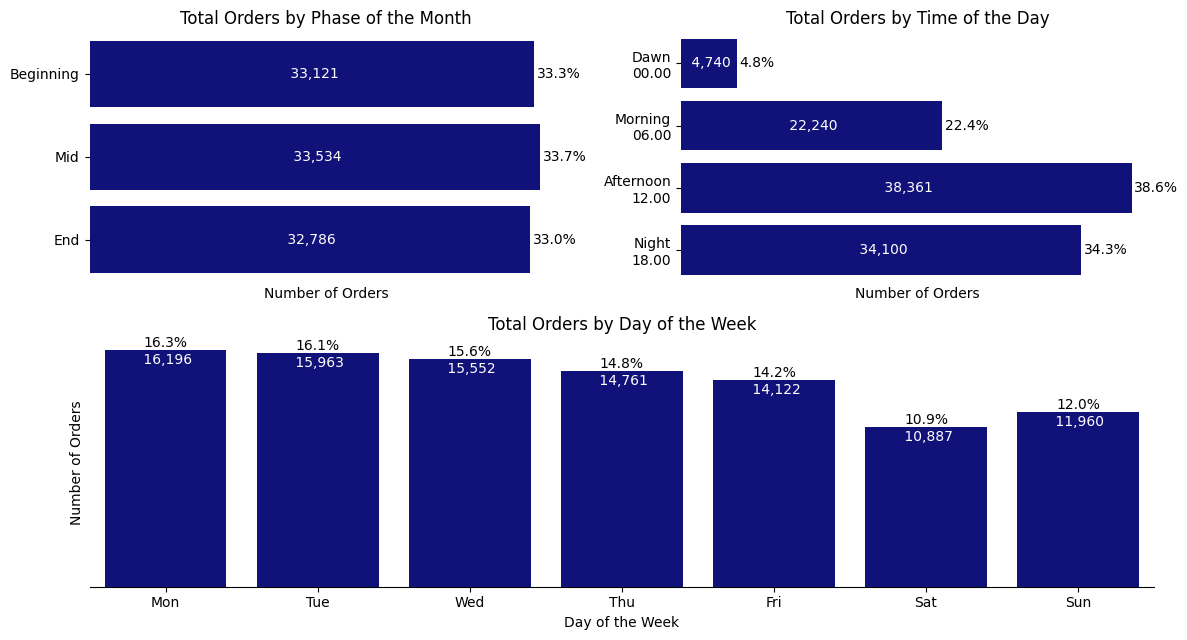

In [71]:
# ---------------------
# 1) PHASE OF THE MONTH
# ---------------------
# Create a new column for the phase of the month
df_orders['order_purchase_day'] = df_orders['order_purchase_timestamp'].dt.day
df_orders['month_phase'] = pd.cut(
    df_orders['order_purchase_day'],
    bins=[0, 10, 20, 31],
    labels=['Beginning', 'Mid', 'End']
)

# Calculate order counts and percentages
order_month_phase_counts = df_orders['month_phase'].value_counts().reindex(['Beginning', 'Mid', 'End'])
order_month_phase_percentages = (order_month_phase_counts / len(df_orders)) * 100

# -------------------------
# 2) TIME OF DAY (DAY PART)
# -------------------------
# Create a new column 'order_purchase_day_time' based on hour
df_orders['order_purchase_day_time'] = pd.cut(
    df_orders['order_purchase_timestamp'].dt.hour,
    bins=[0, 6, 12, 18, 24],
    labels=['Dawn', 'Morning', 'Afternoon', 'Night'],
    right=False
)

# Calculate order counts and percentages
order_purchase_day_counts = df_orders['order_purchase_day_time'].value_counts().reindex(['Dawn', 'Morning', 'Afternoon', 'Night'])
order_purchase_day_percentages = (order_purchase_day_counts / len(df_orders)) * 100

# ----------------------------
# 3) DAY OF THE WEEK (Mon–Sun)
# ----------------------------
# Extract the day of the week (Monday=0, Sunday=6)
df_orders['order_day_of_week'] = df_orders['order_purchase_timestamp'].dt.dayofweek

# Map day of week numbers to day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_orders['order_day_name'] = df_orders['order_day_of_week'].map(lambda x: day_names[x])

# Calculate order counts and percentages
order_purchase_week_counts = df_orders['order_day_name'].value_counts().reindex(day_names)
order_purchase_week_percentages = (order_purchase_week_counts / len(df_orders)) * 100

# -----------------------------------------------------
# CREATE A SINGLE FIGURE WITH 2 ROWS × 2 COLUMNS LAYOUT
# -----------------------------------------------------
fig = plt.figure(figsize=(12, 6.5))
gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[0, 0])  # 1st subplot (Phase of Month)
ax2 = fig.add_subplot(gs[0, 1])  # 2nd subplot (Time of Day)
ax3 = fig.add_subplot(gs[1, :])  # 3rd subplot spanning the entire second row (Day of Week)

# ---------------------------------------------------------
# SUBPLOT 1: Total Orders by Phase of the Month (horizontal)
# ---------------------------------------------------------
bars1 = sns.countplot(
    y='month_phase',
    data=df_orders,
    order=['Beginning', 'Mid', 'End'],
    color="#00008B",
    ax=ax1
)

# Add data labels (count inside, percentage to the right)
for bar, count, percentage in zip(bars1.patches, order_month_phase_counts, order_month_phase_percentages):
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()

    # Count (white text inside bar)
    ax1.text(
        x + width / 2,
        y + height / 2,
        f'{count: ,}',  # thousand separator
        ha='center',
        va='center',
        color='white'
    )
    # Percentage (to the right of the bar)
    ax1.text(
        width + 200,
        y + height / 2,
        f'{percentage:.1f}%',
        ha='left',
        va='center',
        color='black'
    )

sns.despine(ax=ax1, left=True, bottom=True)
ax1.set_xticks([])
ax1.set_xlabel('Number of Orders')
ax1.set_ylabel('')
ax1.set_title('Total Orders by Phase of the Month')

# ------------------------------------------------------
# SUBPLOT 2: Total Orders by Time of the Day (horizontal)
# ------------------------------------------------------
bars2 = sns.countplot(
    y='order_purchase_day_time',
    data=df_orders,
    order=['Dawn', 'Morning', 'Afternoon', 'Night'],
    color="#00008B",
    ax=ax2
)

# Add data labels (count inside, percentage to the right)
for bar, count, percentage in zip(bars2.patches, order_purchase_day_counts, order_purchase_day_percentages):
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()

    # Count (white text inside bar)
    ax2.text(
        x + width / 2,
        y + height / 2,
        f'{count: ,}',
        ha='center',
        va='center',
        color='white'
    )
    # Percentage (to the right of the bar)
    ax2.text(
        width + 200,
        y + height / 2,
        f'{percentage:.1f}%',
        ha='left',
        va='center',
        color='black'
    )

# Modify y-axis labels to two lines (time label + hour)
y_labels = ['Dawn\n00.00','Morning\n06.00','Afternoon\n12.00','Night\n18.00']
ax2.set_yticks(range(len(y_labels)))
ax2.set_yticklabels(y_labels, rotation=0)

sns.despine(ax=ax2, left=True, bottom=True)
ax2.set_xticks([])
ax2.set_xlabel('Number of Orders')
ax2.set_ylabel('')
ax2.set_title('Total Orders by Time of the Day')

# --------------------------------------------------
# SUBPLOT 3: Total Orders by Day of the Week (bottom)
# --------------------------------------------------
bars3 = sns.countplot(
    x='order_day_name',
    data=df_orders,
    order=day_names,
    color="#00008B",
    ax=ax3
)

# Add data labels (count and percentage)
for bar, count, percentage in zip(bars3.patches, order_purchase_week_counts, order_purchase_week_percentages):
    height = bar.get_height()
    x_center = bar.get_x() + bar.get_width() / 2

    # Percentage above the bar
    ax3.text(
        x_center,
        height,
        f'{percentage:.1f}%',
        ha='center',
        va='bottom'
    )
    # Count (white text inside bar, near the top)
    bars3.annotate(
        f'{count: ,}',
        (x_center, height - 200),
        ha='center',
        va='top',
        fontsize=10,
        color='white'
    )

# Abbreviate x-axis labels
x_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ax3.set_xticks(range(len(x_labels)))
ax3.set_xticklabels(x_labels, rotation=0)

sns.despine(ax=ax3, left=True)
ax3.set_yticks([])
ax3.set_xlabel('Day of the Week')
ax3.set_ylabel('Number of Orders')
ax3.set_title('Total Orders by Day of the Week')

plt.tight_layout()
plt.show()

**Insight:**

**Total Orders by Phase of the Month**

- Jumlah order terbagi hampir merata pada awal (33.3%), tengah (33.7%), dan akhir bulan (33.0%). Hal ini menunjukkan tidak adanya kecenderungan kuat jumlah order pada salah satu fase (e.g., setelah tanggal gajian atau akhir bulan)

- **Saran**: Promosi dapat disebar merata pada tiap fase bulan dari pada difokuskan pada satu fase spesifik seperti tanggal gajian

**Total Orders by Time of the Day**

- Siang hari (38.6%) dan malam hari (34.3%) mencakup lebih dari 70% total order yang dibuat pelanggan sehingga terlihat bahwa siang dan malam hari merupakan puncaknya waktu order

- **Saran**: Iklan seperti promosi email, iklan sosial media, dan push notification dapat dijadwalkan menjelang siang sehingga dapat terlihat oleh pelanggan yang biasanya mulai masuk waktu istirahat (jam makan siang)

**Total Orders by Day of the Week**

- Hari ketika jumlah order tinggi adalah Senin (16.3%), Selasa (16.1%), dan Rabu (15.6%). Jumlah order kemudian menurun menjelang akhir pekan dengan Sabtu (10.9%) dan Minggu (12.0%) sebagai hari dengan jumlah order terendah. Pola ini menunjukkan kebiasan berbelanja yang cenderung dilakukan di hari-hari kerja terutama 3 hari awal.
- **Saran**: Karena Senin sampai Rabu merupakan hari puncak, perusahaan dapat mengatur waktu peluncuran produk baru, promosi, atau pengiriman email marketing sesuai dengan hari tersebut sehingga dapat memberikan jangkauan yang maksimal.
- **Saran**: Perusahaan dapat mencoba meningkatkan jumlah order di akhir pekan dengan memberikan diskon khusus akhir pekan, penawaran bebas ongkir, atau flash sales.

### Pertanyaan 2: Kategori Produk

> Kategori produk apa saja yang paling banyak dan paling sedikit dalam hal jumlah item yang dipesan, total nilai item yang dipesan, dan rata-rata jumlah item per order?



In [72]:
print("5 Best Product Categories by Total Items Ordered:")
print(best_items_ordered)
print("\n5 Worst Product Categories by Total Items Ordered:")
print(worst_items_ordered)
print("\n5 Best Product Categories by Total Order Value:")
print(best_order_value)
print("\n5 Worst Product Categories by Total Order Value:")
print(worst_order_value)
print("\n10 Best Product Categories by Items per Order:")
print(best_items_per_order)

5 Best Product Categories by Total Items Ordered:
   product_category_name_english  total_items_ordered  total_order_value  \
8          bath table bath table                11115         1036988.68   
47                 health beauty                 9670         1258681.34   
67                 sport leisure                 8641          988048.97   
40          furniture decoration                 8334          729762.49   
17          computer accessories                 7827          911954.32   

    total_orders  total_customers  items_per_order  
8           9417             9417         1.180312  
47          8836             8836         1.094387  
67          7720             7720         1.119301  
40          6449             6449         1.292293  
17          6689             6689         1.170130  

5 Worst Product Categories by Total Items Ordered:
   product_category_name_english  total_items_ordered  total_order_value  \
54        insurance and services               

In [73]:
top_10_product_category_pairs

,product_category_pair,total_orders
67,"bath table bath table, furniture decoration",67
75,"bath table bath table, house comfort",42
151,"domestic utilities, furniture decoration",22
61,"bath table bath table, domestic utilities",20
33,"babies, cool stuff",19
46,"babies, toys",19
196,"furniture decoration, garden tools",16
164,"domestic utilities, uncategorized",14
27,"babies, bath table bath table",14
231,"health beauty, sport leisure",13


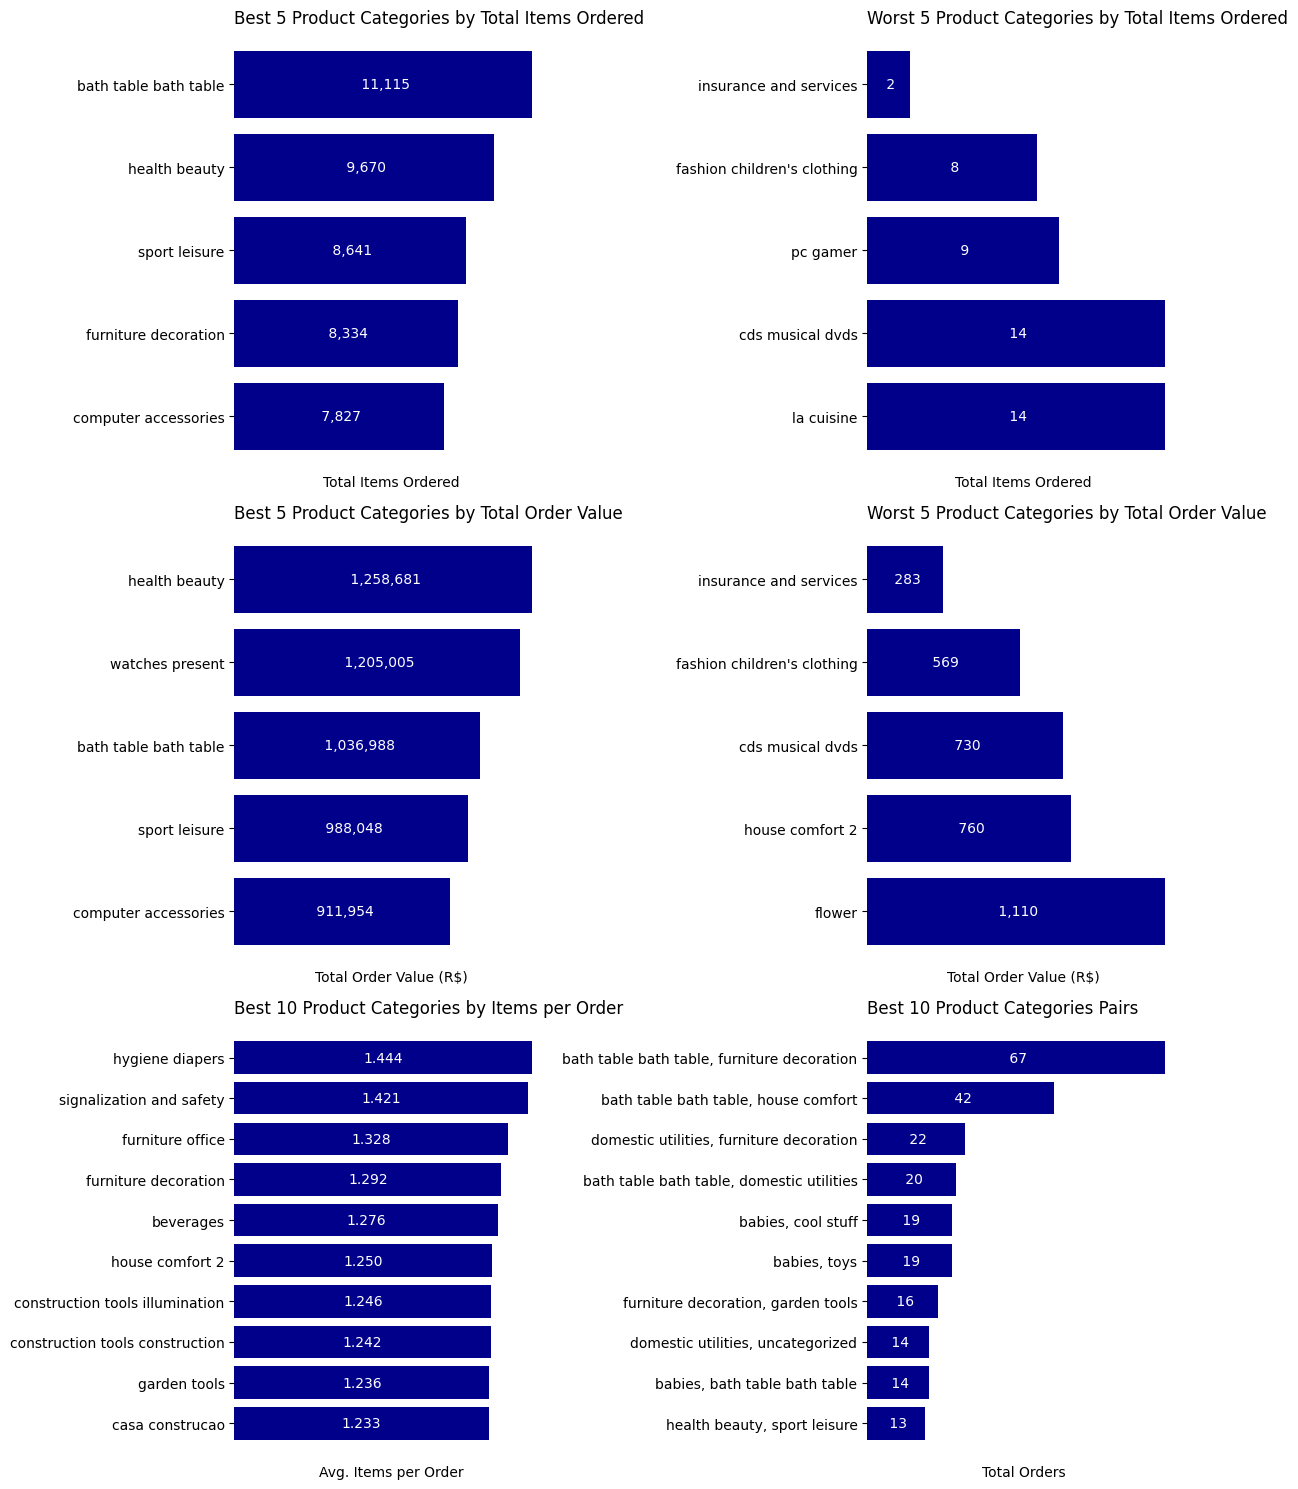

In [74]:
# Create a single figure with 3 rows × 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

# -------------------------------------------------
# SUBPLOT 1: Best 5 Product Categories by Total Items Ordered
# -------------------------------------------------
ax1 = axes[0, 0]
bars1 = ax1.barh(
    best_items_ordered['product_category_name_english'],
    best_items_ordered['total_items_ordered'],
    color='#00008B'
)

# Add data labels inside the bars
for bar in bars1:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    ax1.text(
        width / 2,
        label_y,
        f'{int(width): ,}',    # thousand separator
        ha='center',
        va='center',
        color='white'
    )

ax1.set_xlabel('Total Items Ordered')
ax1.set_title('Best 5 Product Categories by Total Items Ordered', loc='left')
ax1.invert_yaxis()  # Invert y-axis for better readability

# Remove the graph border & x-axis ticks
sns.despine(ax=ax1, left=True, bottom=True)
ax1.set_xticks([])

# -------------------------------------------------
# SUBPLOT 2: Worst 5 Product Categories by Total Items Ordered
# -------------------------------------------------
ax2 = axes[0, 1]
bars2 = ax2.barh(
    worst_items_ordered['product_category_name_english'],
    worst_items_ordered['total_items_ordered'],
    color='#00008B'
)

# Add data labels inside the bars
for bar in bars2:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    ax2.text(
        width / 2,
        label_y,
        f'{int(width): ,}',
        ha='center',
        va='center',
        color='white'
    )

ax2.set_xlabel('Total Items Ordered')
ax2.set_title('Worst 5 Product Categories by Total Items Ordered', loc='left')
ax2.invert_yaxis()

sns.despine(ax=ax2, left=True, bottom=True)
ax2.set_xticks([])

# -------------------------------------------------
# SUBPLOT 3: Best 5 Product Categories by Total Order Value
# -------------------------------------------------
ax3 = axes[1, 0]
bars3 = ax3.barh(
    best_order_value['product_category_name_english'],
    best_order_value['total_order_value'],
    color='#00008B'
)

# Add data labels inside the bars
for bar in bars3:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    ax3.text(
        width / 2,
        label_y,
        f'{int(width): ,}',
        ha='center',
        va='center',
        color='white'
    )

ax3.set_xlabel('Total Order Value (R$)')
ax3.set_title('Best 5 Product Categories by Total Order Value', loc='left')
ax3.invert_yaxis()

sns.despine(ax=ax3, left=True, bottom=True)
ax3.set_xticks([])

# -------------------------------------------------
# SUBPLOT 4: Worst 5 Product Categories by Total Order Value
# -------------------------------------------------
ax4 = axes[1, 1]
bars4 = ax4.barh(
    worst_order_value['product_category_name_english'],
    worst_order_value['total_order_value'],
    color='#00008B'
)

# Add data labels inside the bars
for bar in bars4:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    ax4.text(
        width / 2,
        label_y,
        f'{int(width): ,}',
        ha='center',
        va='center',
        color='white'
    )

ax4.set_xlabel('Total Order Value (R$)')
ax4.set_title('Worst 5 Product Categories by Total Order Value', loc='left')
ax4.invert_yaxis()

sns.despine(ax=ax4, left=True, bottom=True)
ax4.set_xticks([])

# -------------------------------------------------
# SUBPLOT 5: Best 10 Product Categories by Items per Order
# -------------------------------------------------
ax5 = axes[2, 0]
bars5 = ax5.barh(
    best_items_per_order['product_category_name_english'],
    best_items_per_order['items_per_order'],
    color='#00008B'
)

# Add data labels inside the bars (format with 3 decimals)
for bar in bars5:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    ax5.text(
        width / 2,
        label_y,
        f'{width:.3f}',
        ha='center',
        va='center',
        color='white'
    )

ax5.set_xlabel('Avg. Items per Order')
ax5.set_title('Best 10 Product Categories by Items per Order', loc='left')
ax5.invert_yaxis()

sns.despine(ax=ax5, left=True, bottom=True)
ax5.set_xticks([])

# -------------------------------------------------
# SUBPLOT 6: Best 10 Product Categories Pairs
# -------------------------------------------------
ax6 = axes[2, 1]
bars6 = ax6.barh(
    top_10_product_category_pairs['product_category_pair'],
    top_10_product_category_pairs['total_orders'],
    color='#00008B'
)

# Add data labels inside the bars
for bar in bars6:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    ax6.text(
        width / 2,
        label_y,
        f'{int(width): ,}',
        ha='center',
        va='center',
        color='white'
    )

ax6.set_xlabel('Total Orders')
ax6.set_title('Best 10 Product Categories Pairs', loc='left')
ax6.invert_yaxis()

sns.despine(ax=ax6, left=True, bottom=True)
ax6.set_xticks([])

plt.tight_layout()
plt.show()

**Insight:**
- **Best 5 Products**: Kategori produk seperti bath table bath table, health beauty, sport leisure, dan computer accessories muncul sebagai top kategori berdasarkan jumlah item dan nilai total order. Perusahaan dapat berfokus pada kategori produk ini dalam kegiatan pemasaran, pengelolaan stok, dan promosi produk.
- **Worst 5 Products**: Kategori produk dengan jumlah item dan nilai total order paling rendah seperti insurance and services dan fashion children's clothing mungkin memerlukan promosi khusus untuk mendorong pemesanan.
- **Best Products by Items per Order**: Perusahaan dapat memanfaatkan promosi Bulk-buy atau penawaran langganan pada pemesanan kategori produk yang masuk ke dalam kelompok ini seperti diapers dan furnitur office
- **Best Category Pairs**: Perusahaan dapat memanfat potensi cross-selling dari pasangan kategori terbaik dengan menawarkan bundle produk atau diskon untuk pesanan dengan pasangan kategori tertentu.

## Analisis Lanjutan (Opsional)

In [75]:
summary_dataset

,DataFrame Name,Column Name,dtype,Minimum Value,Maximum Value,Number of Rows,Number of Missing Values,Number of Unique Values,Number of Duplicated Values
0,df_orders,order_id,object,NaN,NaN,99441,0,99441,0
1,df_orders,customer_id,object,NaN,NaN,99441,0,99441,0
2,df_orders,order_status,object,NaN,NaN,99441,0,8,99433
3,df_orders,order_purchase_timestamp,object,NaN,NaN,99441,0,98875,566
4,df_orders,order_approved_at,object,NaN,NaN,99441,160,90733,8707
5,df_orders,order_delivered_carrier_date,object,NaN,NaN,99441,1783,81018,18422
6,df_orders,order_delivered_customer_date,object,NaN,NaN,99441,2965,95664,3776
7,df_orders,order_estimated_delivery_date,object,NaN,NaN,99441,0,459,98982
8,df_orders_items,order_id,object,NaN,NaN,112650,0,98666,13984
9,df_orders_items,order_item_id,int64,1.000000,21.000000,112650,0,21,112629


Terdapat tiga pilihan teknik analisis lanjutan yaitu RFM Analysis, Geospatial Analysis, dan Clustering.

Teknik Analisis yang dipilih:
*   **Geospatial Analysis** karena dataset memberikan data mengenai lokasi dari penjual dan pelanggan berdasarkan zip_code_prefix.

Teknik Analisis yang tidak dipilih:

*   **RFM Analysis** karena dataset yang menjelaskan data order pelanggan (df_orders) menujukkan setiap customer_id hanya melakukan sekali order sehingga tidak menunjukkan variasi Frequency dalam RFM Analysis.
*   **Clustering** karena dataset terkait customer (df_customers) tidak memberikan atribut lain selain lokasi sehingga tidak bisa melakukan clustering tanpa adanya atribut lain seperti demografi.



### Menentukan Pertanyaan Bisnis

Agar analisis lanjutan lebih terarah, pertanyaan bisnis ditentukan sebagai berikut:

> Provinsi (state) mana saja dengan waktu pengiriman paling lama?

Alasan: Sebagai perusahaan e-commerce, waktu pengiriman sangat menentukan kepuasan pelanggan. Sengan mengetahui wilayah mana yang memiliki waktu pengiriman paling lama, perusahaan dapat memperbaiki aktivitas logistik di wilayah tersebut agar meningkatkan kepuasan pelanggan.




**Asumsi**:
* Waktu pengiriman dihitung dari pelanggan mengorder hingga order tersebut sampai ke pelanggan (`order_delivered_customer_date` - `order_purchase_timestamp`)
* Order yang dimaksud adalah order yang melibatkan produk fisik sehingga akan ada waktu untuk mengirimkan produk kepada pelanggan

### Data Wrangling

In [76]:
# Calculate delivery time in seconds
df_orders['delivery_time'] = (pd.to_datetime(df_orders['order_delivered_customer_date']) - pd.to_datetime(df_orders['order_purchase_timestamp'])).dt.total_seconds()

# Convert delivery time to days
df_orders['delivery_time'] = df_orders['delivery_time'] / (24 * 60 * 60)

# Create new table only for delivered orders
df_orders_delivered = df_orders[df_orders['order_status'] == 'delivered']

df_orders_delivered.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
order_purchase_month              0
order_purchase_day_time           0
order_day_of_week                 0
order_day_name                    0
order_purchase_day                0
month_phase                       0
delivery_time                     8
dtype: int64

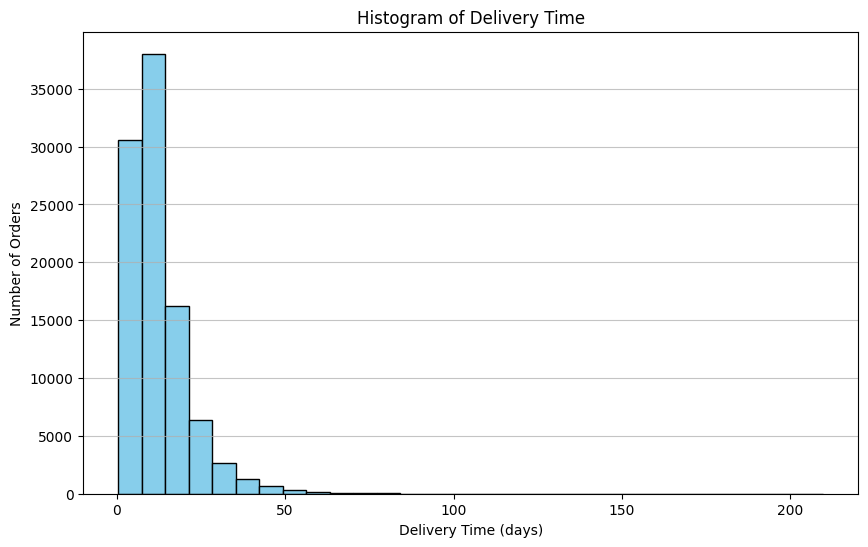

In [77]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.hist(df_orders['delivery_time'], bins=30, color='skyblue', edgecolor='black')  # Adjust number of bins
plt.xlabel('Delivery Time (days)')
plt.ylabel('Number of Orders')
plt.title('Histogram of Delivery Time')
plt.grid(axis='y', alpha=0.75)
plt.show()

Karena `delivery_time` memiliki distribusi right-skewed maka ukuran nilai tengah untuk `deliver_time` menggunakan median

Nilai kosong `delivery_time` akan diimputasi berdasarkan median sementara `delivery_time`

In [78]:
median_delivery_time = df_orders_delivered['delivery_time'].median()

# Impute missing values delivery_time
df_orders_delivered = df_orders_delivered.fillna({'delivery_time': median_delivery_time})
df_orders_delivered.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
order_purchase_month              0
order_purchase_day_time           0
order_day_of_week                 0
order_day_name                    0
order_purchase_day                0
month_phase                       0
delivery_time                     0
dtype: int64

In [79]:
orders_delivered_percentage = df_orders_delivered.shape[0] / df_orders.shape[0] * 100
print(f"Persentase order terkirim: {orders_delivered_percentage:.2f}%")
print(f"Median waktu pengiriman: {median_delivery_time:.3} hari")

Persentase order terkirim: 97.02%
Median waktu pengiriman: 10.2 hari


Untuk analisis geospasial, diperlukan data geolocation pada tiap orders. Oleh karena itu df_orders_delivered menambahkan kolom baru dari df_customers dan df_geolocation untuk melengkapi data geolocation. Namun karena sangat mungkin terdapat data geolocation yang tidak dapat diisi untuk tiap orders maka proses melengkapi dari tabel lain menggunakan inner join untuk menghidari missing value pada data geolocation

In [80]:
# Add customer_zip_code_prefix from df_customers (inner join)
df_orders_delivered = pd.merge(df_orders_delivered, df_customers[['customer_id', 'customer_zip_code_prefix']], on='customer_id', how='inner')

# change column customer_zip_code_prefix to geolocation_zip_code_prefix for merging with df_geolocation
df_orders_delivered = df_orders_delivered.rename(columns={'customer_zip_code_prefix': 'geolocation_zip_code_prefix'})

In [81]:
# create new table geolocation with unique zip code prefix
df_geolocation_unique = df_geolocation_dataset.drop_duplicates(subset=['geolocation_zip_code_prefix'])

# add geolocation_lat, geolocation_lng, geolocation_city, geolocation_state from df_geolocation_dataset (inner join)
df_orders_delivered = pd.merge(df_orders_delivered,
                               df_geolocation_unique[[
                                   'geolocation_zip_code_prefix',
                                   'geolocation_lat',
                                   'geolocation_lng',
                                   'geolocation_city',
                                   'geolocation_state']],
                               on='geolocation_zip_code_prefix',
                               how='inner')

# change the added columns names from geolocation to customer
df_orders_delivered = df_orders_delivered.rename(columns={
    'geolocation_zip_code_prefix': 'customer_zip_code_prefix',
    'geolocation_lat': 'customer_lat',
    'geolocation_lng': 'customer_lng',
    'geolocation_city': 'customer_city',
    'geolocation_state': 'customer_state'})

df_orders_delivered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96214 entries, 0 to 96213
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96214 non-null  object        
 1   customer_id                    96214 non-null  object        
 2   order_status                   96214 non-null  object        
 3   order_purchase_timestamp       96214 non-null  datetime64[ns]
 4   order_approved_at              96200 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96212 non-null  datetime64[ns]
 6   order_delivered_customer_date  96206 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96214 non-null  datetime64[ns]
 8   order_purchase_month           96214 non-null  period[M]     
 9   order_purchase_day_time        96214 non-null  category      
 10  order_day_of_week              96214 non-null  int32         
 11  order_day_name 

### Explore Data

Agar memudahkan visualisasi, tabel baru dibuat yang memuat rangkuman dari median `delivery_time` untuk tiap `customer_zip_code_prefix`.

In [82]:
# Create the customer_geolocation table
customer_geolocation = df_orders_delivered.groupby('customer_zip_code_prefix').agg(
    customer_lat=('customer_lat', 'mean'),
    customer_lng=('customer_lng', 'mean'),
    customer_city=('customer_city', 'first'),  # Take the first city for each zip code
    customer_state=('customer_state', 'first'),  # Take the first state for each zip code
    median_delivery_time=('delivery_time', 'median')
).reset_index()

# Display the resulting table
customer_geolocation.sample(5)

,customer_zip_code_prefix,customer_lat,customer_lng,customer_city,customer_state,median_delivery_time
7777,36895,-20.864329,-42.245958,vieiras,MG,9.986887
142,1316,-23.552982,-46.639774,sao paulo,SP,3.943773
10741,65921,-5.169769,-47.785461,cidelandia,MA,23.156597
10700,65636,-5.088449,-42.838387,timon,MA,12.984780
4857,15093,-20.852452,-49.419145,são josé do rio preto,SP,8.052390


In [83]:
# Create the state_delivery table
state_delivery = df_orders_delivered.groupby('customer_state').agg(
    customer_lat=('customer_lat', 'mean'),
    customer_lng=('customer_lng', 'mean'),
    median_delivery_time=('delivery_time', 'median')
).reset_index()

# Display the resulting table
state_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_state        27 non-null     object 
 1   customer_lat          27 non-null     float64
 2   customer_lng          27 non-null     float64
 3   median_delivery_time  27 non-null     float64
dtypes: float64(3), object(1)
memory usage: 996.0+ bytes


In [84]:
# 10 shortest average delivery times
shortest_delivery_states = state_delivery.nsmallest(10, 'median_delivery_time')

# 10 longest average delivery times
longest_delivery_states = state_delivery.nlargest(10, 'median_delivery_time')

print("10 customer states with the shortest median delivery time:")
print(shortest_delivery_states)

print("\n10 customer states with the longest median delivery time:")
print(longest_delivery_states)

10 customer states with the shortest median delivery time:
   customer_state  customer_lat  customer_lng  median_delivery_time
25             SP    -23.165277    -47.051439              7.210255
10             MG    -19.921434    -44.437888             10.312326
17             PR    -24.753817    -50.773105             10.419109
6              DF    -15.813916    -47.959289             11.362639
18             RJ    -22.760546    -43.176376             12.039803
23             SC    -27.243980    -49.558204             13.014352
22             RS    -29.731187    -51.965202             13.173576
7              ES    -20.158680    -40.479735             13.636956
8              GO    -16.605417    -49.335667             13.936811
11             MS    -20.741176    -54.441078             13.943796

10 customer states with the longest median delivery time:
   customer_state  customer_lat  customer_lng  median_delivery_time
2              AM     -3.215343    -60.077935             25.87513

Dari tabel diatas, kita mendapatkan 10 provinsi tercepat dan terlama dalam hal median `delivery_time`. Namun, apakah terdapat pola tertentu dari informasi ini? Mari kita lihat melalui analisis geospasial.

Pertama, kita lihat terlebih dahulu dari peta dengan basis provinsi (state) untuk melihat pola `delivery_time`.

In [85]:
# Load Brazil states shapefile
file_id = '1zoHAj7jNM9pj7yyfn4b4mEBdAAzAvp7n'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'brazil_states.zip'
gdown.download(url, output, quiet=False)
brazil_states = gpd.read_file('brazil_states.zip')

Downloading...
From: https://drive.google.com/uc?id=1zoHAj7jNM9pj7yyfn4b4mEBdAAzAvp7n
To: c:\Users\felha\Downloads\brazil_states.zip
100%|██████████| 2.25M/2.25M [00:01<00:00, 1.67MB/s]


In [86]:
brazil_states.sample(5)

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
13,33,BRA,Brazil,14,Pará,BR.PA,0,None,Estado,State,None,None,"MULTIPOLYGON (((-46.43458 -1.01708, -46.43458 ..."
12,33,BRA,Brazil,13,Minas Gerais,BR.MG,0,None,Estado,State,None,Minas|Minas Geraes,"POLYGON ((-44.20978 -14.23665, -44.20908 -14.2..."
0,33,BRA,Brazil,1,Acre,BR.AC,0,None,Estado,State,None,None,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350..."
4,33,BRA,Brazil,5,Bahia,BR.BA,0,None,Estado,State,None,Ba¡a,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708..."
21,33,BRA,Brazil,22,Rondônia,BR.RO,0,None,Estado,State,None,Guaporé,"POLYGON ((-63.5347 -7.97434, -63.5005 -7.97633..."


In [87]:
state_delivery.sample(5)

,customer_state,customer_lat,customer_lng,median_delivery_time
26,TO,-9.734131,-48.376919,15.884514
17,PR,-24.753817,-50.773105,10.419109
9,MA,-3.576078,-44.709367,19.159005
8,GO,-16.605417,-49.335667,13.936811
4,BA,-13.035019,-39.471124,16.912639


In [88]:
brazil_states['customer_state'] = brazil_states['HASC_1'].str.replace('BR.', '')
brazil_states.sample(5)

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,customer_state
2,33,BRA,Brazil,3,Amapá,BR.AP,0,None,Estado,State,None,None,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0...",AP
13,33,BRA,Brazil,14,Pará,BR.PA,0,None,Estado,State,None,None,"MULTIPOLYGON (((-46.43458 -1.01708, -46.43458 ...",PA
4,33,BRA,Brazil,5,Bahia,BR.BA,0,None,Estado,State,None,Ba¡a,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708...",BA
8,33,BRA,Brazil,9,Goiás,BR.GO,0,None,Estado,State,None,Goiáz|Goyáz,"POLYGON ((-50.15817 -12.41238, -50.15942 -12.4...",GO
24,33,BRA,Brazil,25,Santa Catarina,BR.SC,0,None,Estado,State,None,Santa Catharina,"MULTIPOLYGON (((-48.75514 -28.51041, -48.75459...",SC


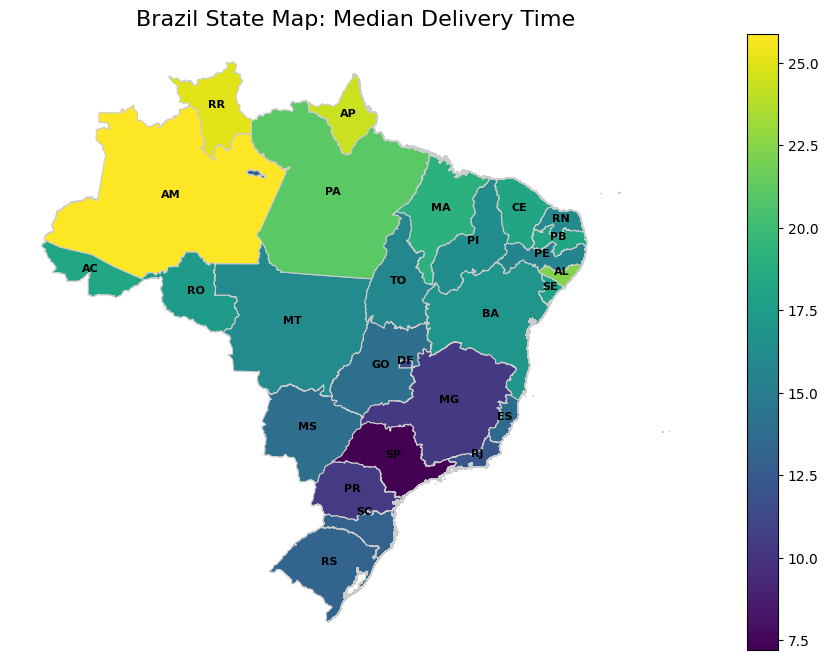

In [89]:
# Merge the state_delivery data with the shapefile based on the state name
merged_data = brazil_states.merge(state_delivery, left_on='customer_state', right_on='customer_state', how='left')

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the map with color gradation based on 'median_delivery_time'
merged_data.plot(column='median_delivery_time', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add state names to the map
for _, row in merged_data.iterrows():
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['customer_state'], fontsize=8, ha='center', color='black', weight='bold')

# Add title and labels
plt.title('Brazil State Map: Median Delivery Time', fontsize=16)

# Remove axis ticks and labels for a cleaner look
ax.set_axis_off()

# Display the plot
plt.show()

Berdasarkan visualisasi geospasial diatas, kita dapat melihat bahwa provinsi bagian utara cenderung memiliki waktu pengiriman yang lebih lama dibandingkan dengan provinsi bagian selatan.

### Visualization & Analysis



> Provinsi (state) mana saja dengan waktu pengiriman paling lama?



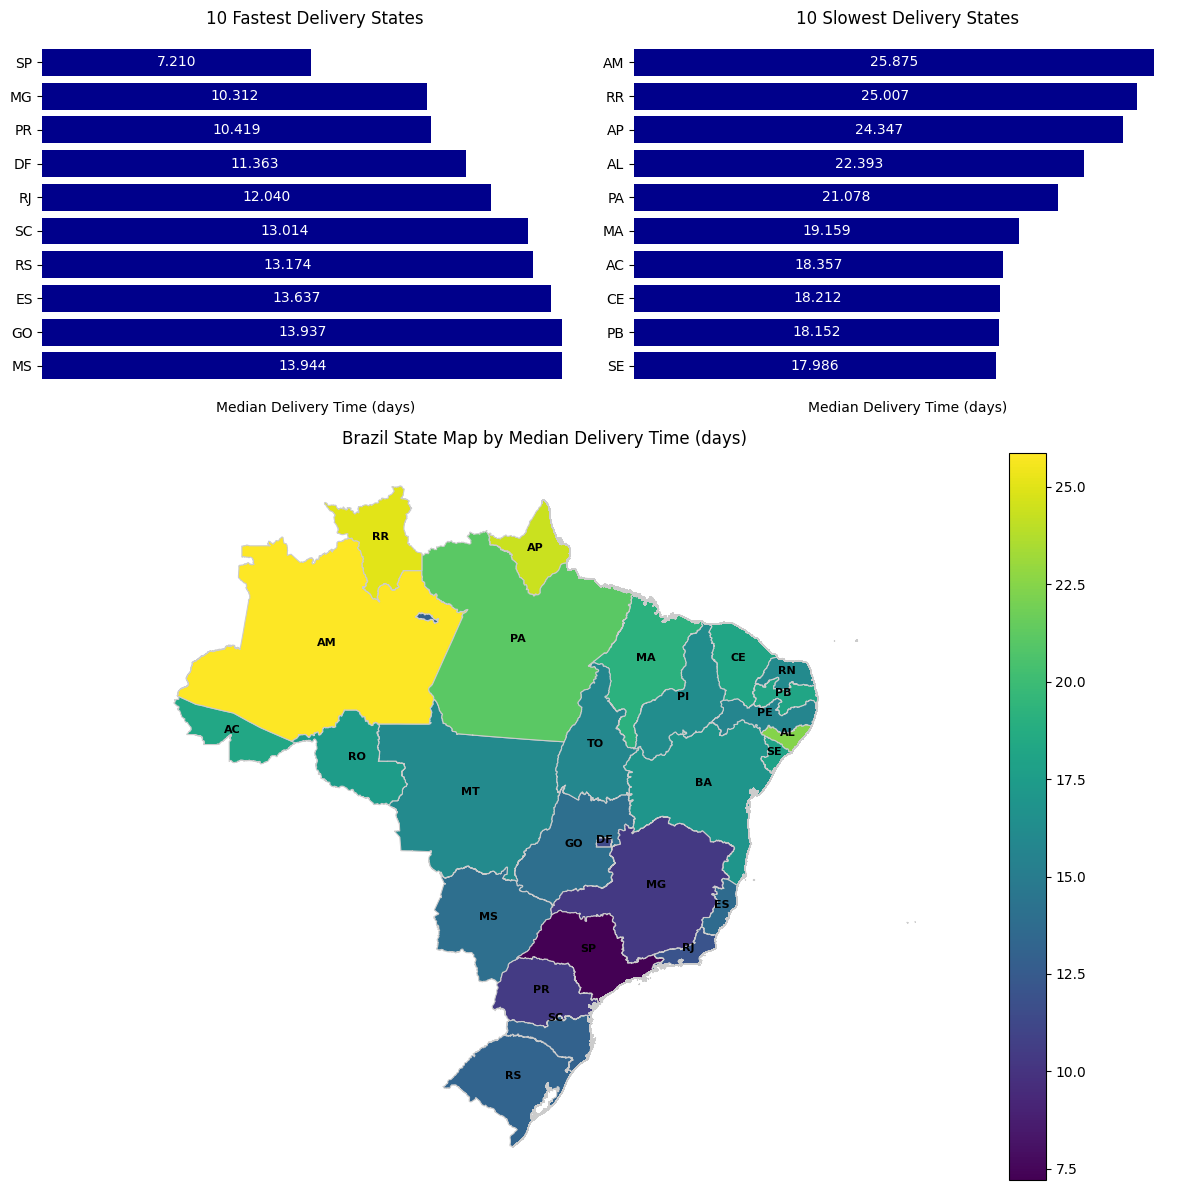

In [90]:
# Merge shapefile with data
merged_data = brazil_states.merge(
    state_delivery,
    on='customer_state',
    how='left'
)

# Create figure with total size ~ (12, 12)
fig = plt.figure(figsize=(12, 12))

# Define a 2×2 grid:
#  - Row 1 has height ratio 4
#  - Row 2 has height ratio 8
#  - Each column has width ratio 6 (so total width = 6+6=12)
gs = fig.add_gridspec(
    nrows=2, ncols=2,
    height_ratios=[4, 8],
    width_ratios=[6, 6]
)

# Subplot 1 (row=0, col=0): 10 Fastest Delivery States
ax1 = fig.add_subplot(gs[0, 0])
bars1 = ax1.barh(
    shortest_delivery_states['customer_state'],
    shortest_delivery_states['median_delivery_time'],
    color='#00008B'
)
for bar in bars1:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    ax1.text(width / 2, label_y, f'{width:.3f}', ha='center', va='center', color='white')

ax1.set_xlabel('Median Delivery Time (days)')
ax1.set_title('10 Fastest Delivery States', loc='center')
ax1.invert_yaxis()
sns.despine(ax=ax1, left=True, bottom=True)
ax1.set_xticks([])

# Subplot 2 (row=0, col=1): 10 Slowest Delivery States
ax2 = fig.add_subplot(gs[0, 1])
bars2 = ax2.barh(
    longest_delivery_states['customer_state'],
    longest_delivery_states['median_delivery_time'],
    color='#00008B'
)
for bar in bars2:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    ax2.text(width / 2, label_y, f'{width:.3f}', ha='center', va='center', color='white')

ax2.set_xlabel('Median Delivery Time (days)')
ax2.set_title('10 Slowest Delivery States', loc='center')
ax2.invert_yaxis()
sns.despine(ax=ax2, left=True, bottom=True)
ax2.set_xticks([])

# Subplot 3 (row=1, all columns): Brazil State Map
ax3 = fig.add_subplot(gs[1, :])
merged_data.plot(
    column='median_delivery_time',
    cmap='viridis',
    linewidth=0.8,
    ax=ax3,
    edgecolor='0.8',
    legend=True
)
for _, row in merged_data.iterrows():
    centroid = row['geometry'].centroid
    ax3.text(centroid.x, centroid.y, row['customer_state'],
             fontsize=8, ha='center', color='black', weight='bold')

ax3.set_title('Brazil State Map by Median Delivery Time (days)', fontsize=12)
ax3.set_axis_off()

plt.tight_layout()
plt.show()


**Insights**

*   Peta visualisasi waktu pengiriman memperlihatkan wilayah selatan dan tenggara memiliki median waktu pengiriman lebih pendek (berwarna kuning dan hijau pada peta) sedangkan wilaya utara dan timur laut lebih panjang.
* Hal ini kemungkinan disebabkan oleh tantangan geografis di wilayah utara dan timur laut yang masih dipenuhi hutan hujan tropis, sungai, dan wilayah yang lebih luas sehingga jaringan transportasi di wilayah tersebut belum memadai

**Saran untuk Perusahaah (Olist)**

* Jika jaringan distrbusi belum berkembang untuk wilayah bagian utara dan timur laut, perusahaan perlu memberikan ekspektasi waktu pengiriman yang realistis untuk pelanggan.
* Mempertimbangkan untuk membangun pusat pemenuhan order (fulfillment center) khusus untuk wilayah bagian utara untuk mengurangi jarak transit pengiriman jika memang layak untuk dibangun berdasarkan hasil analisis fisibilitas.

## Conclusion

> Bagaimana sebaran pesanan produk dalam rentang waktu satu hari, satu minggu, dan satu bulan?

Pesanan produk yang dibuat oleh pelanggan memiliki pola sebaran yang berbeda pada tiap rentang waktu. Dalam satu bulan, jumlah pesanan tersebar hampir merata disetiap fase bulan (awal, tengah, dan akhir). Dalam satu minggu, jumlah pesanan cenderung memuncak pada 3 hari awal (Senin, Selasa, dan Rabu). Sedangkan dalam satu hari, pesanan lebih banyak dibuat di siang dan malam hari (12.00-24.00).

> Kategori produk apa saja yang memiliki paling banyak dan paling sedikit dalam hal jumlah item yang dipesan, total nilai item yang dipesan, dan rata-rata jumlah item per order?

Kategori produk yang memiliki total jumlah item yang dipesan dan total nilai item yang tinggi adalah bath table bath table, health beauty, sport leisure, dan computer accessories. Kategori produk yang sering dibeli lebih dari satu item per pesanan yaitu diapers, signalization and safety, furniture office, dan furniture decoration. Selain itu terdapat pasangan kategori yang sering dibeli dalam satu pesanan yaitu bath table bath table dengan furniture decoration, house comfort, dan domestic utilities.

> Provinsi (state) mana saja dengan waktu pengiriman paling lama?

Provinsi yang berada di wilayah utara dan timur laut Brazil memiliki waktu pengiriman paling lama sekitar 20-25 hari per pesanan. Provinsi tersebut salah satunya adalah Amazonas (AM), Roraima (RR), Amapá (AP), dan Pará (PA)
